# 상관분석

$H_ 0 : $ 변수간에는 상관관계가 없다( 상관계수 $= 0$)

$H_1 : $ 변수간에는 상관관계가 있다.( 상관계수 $\neq 0$ )

 * 피어슨 상관계수
     * 두 연속형 자료가 모두 정규성을 따른다는 가정하에 선형적 상관관계를 측정

* 스피어만 상관계수
    * 데이터가 정규성을 만족하지 않거나 순위 및 순서 형태로 주어지는 경우 사용
    * 피어슨 상관계수와 달리 비선형 관계의 연관성을 파악할 수 있다.
    * 비모수적 방법

* 켄달의 순위상관계수
    * $X_i$가 커짐에 따라 $Y_i$도 커질 경우 부합, 작아질 경우 비부합이라고 본다.
    * 전체 데이터에서 비부합쌍에 대한 부합쌍의 비율로 상관계수를 산출한다.
    * 순위상관계수가 -1 일 경우 비부합쌍의 비율이 100%, 0일 경우 두 변수 $X,Y$는 상관성이 없음을 의미한다.

$\divideontimes$ 원래의 경우 독립이면 상관계수는 0이지만, 이것에 대한 역은 반드시 성립하지 않는다.

https://techntalk.tistory.com/entry/%ED%86%B5%EA%B3%84%EC%A0%81%EC%9C%BC%EB%A1%9C-%EB%91%90-%EB%B3%80%EC%88%98%EC%9D%98-%EB%8F%85%EB%A6%BDindependence%EA%B3%BC-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98correlation%EC%99%80%EC%9D%98-%EA%B4%80%EA%B3%84

## R 실습

In [4]:
library(tidyverse)

In [5]:
data("airquality")

In [6]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [9]:
air <- airquality %>% select(-c(Day,Month))

In [13]:
air_cor <- cor(air,use="pairwise.complete.obs",method="pearson")

* use
    * everything : 결측값 존재 시 NA출력
    * all.obs : 결측값 존재 시 오류 메시지 출력
    * complete.obs : 변수별로 결측값을 제외하고 상관계수 계산
    * pairwise.complete.obs : 모든 변수 쌍에서 결측값이 없는 데이터들에 대해 상관계수 계산

In [19]:
library(corrplot)

In [39]:
testRes <- cor.mtest(air,method="pearson")

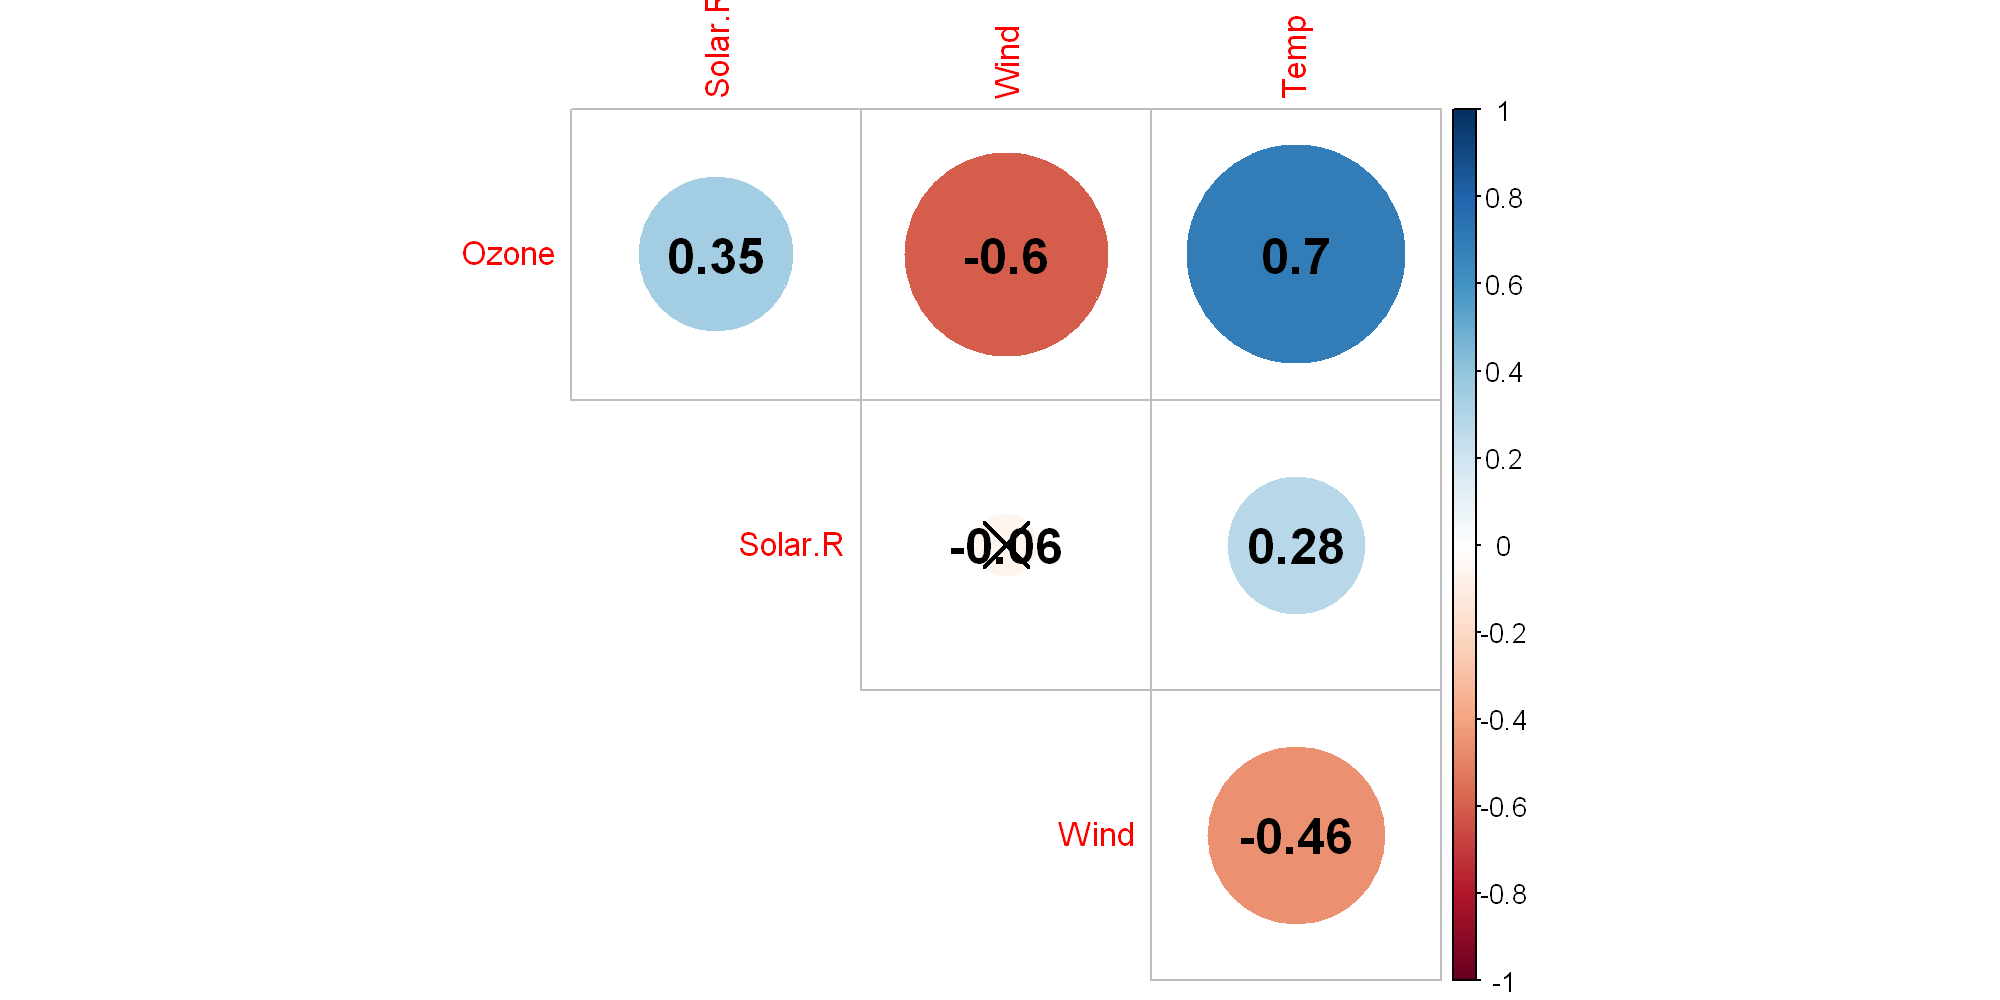

In [37]:
options(repr.plot.res=200,repr.plot.height=5,repr.plot.width=10)
corrplot(air_cor,diag=F,type="upper",p.mat=testRes$p,
            method="circle",number.cex=1.5,addCoef.col="black")

* 위 그래프를 해석하면 `Wind`와 `Solar.R`간에는 상관관계가 없다고 해석할 수 있다.

In [44]:
cor.test(air$Wind,air$Solar.R) ##실제 검정 결과도 동일하다.


	Pearson's product-moment correlation

data:  air$Wind and air$Solar.R
t = -0.6826, df = 144, p-value = 0.496
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2172359  0.1066406
sample estimates:
        cor 
-0.05679167 
